# Google Play Store App Review Analysis & LLM-Powered Recommendations

# Task 1. Exploration

## Data Loading & Setup

### Install and Import Required Libraries

In [1]:
%pip install kagglehub
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install langdetect
%pip install scikit-learn
%pip install nltk
%pip install openai

import os

import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


c:\Users\jeshw\miniconda3\envs\gapps_sentiment_analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Download and Load Data

In [2]:
# Download latest version of dataset
path = kagglehub.dataset_download("lava18/google-play-store-apps")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jeshw\.cache\kagglehub\datasets\lava18\google-play-store-apps\versions\6


In [3]:
project_data_dir = os.path.join(os.getcwd(), "data/google-play-store-apps/versions/6")
ps_csv_path = os.path.join(project_data_dir, "googleplaystore.csv")
ps_review_csv_path = os.path.join(project_data_dir, "googleplaystore_user_reviews.csv")

ps_df = pd.read_csv(ps_csv_path)
ps_review_df = pd.read_csv(ps_review_csv_path)

## Data Cleaning & Preprocessing

### Initial Data Exploration

In [4]:
print("Shape:", ps_df.shape)
print("Columns:", ps_df.columns)
display(ps_df.info())

Shape: (10841, 13)
Columns: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  o

None

In [5]:
print("Shape:", ps_review_df.shape)
print("Columns:", ps_review_df.columns)
display(ps_review_df.info())

Shape: (64295, 5)
Columns: Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


None

In [6]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
ps_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Data Type Conversion and Memory Optimization

In [8]:
# Reduce memory footprint by downcast numeric columns and convert suitable columns to category

# Numeric columns
ps_df['Reviews'] = pd.to_numeric(ps_df['Reviews'], errors='coerce', downcast='integer')
ps_df['Rating'] = pd.to_numeric(ps_df['Rating'], errors='coerce', downcast='float')
ps_df['Installs'] = ps_df['Installs'].str.replace('[+,]', '', regex=True)
ps_df['Installs'] = pd.to_numeric(ps_df['Installs'], errors='coerce', downcast='integer')
ps_df['Price'] = ps_df['Price'].str.replace('$', '', regex=False)
ps_df['Price'] = pd.to_numeric(ps_df['Price'], errors='coerce', downcast='float')

# Categorical columns
cat_cols = ['Category', 'Type', 'Content Rating', 'Genres']
for col in cat_cols:
    if col in ps_df.columns:
        ps_df[col] = ps_df[col].astype('category')

# Date column
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'], errors='coerce')

# String columns
for col in ['App', 'Current Ver', 'Android Ver']:
    if col in ps_df.columns:
        ps_df[col] = ps_df[col].astype('string')

ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  string        
 1   Category        10841 non-null  category      
 2   Rating          9367 non-null   float32       
 3   Reviews         10840 non-null  float64       
 4   Size            10841 non-null  object        
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  category      
 7   Price           10840 non-null  float32       
 8   Content Rating  10840 non-null  category      
 9   Genres          10841 non-null  category      
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  string        
 12  Android Ver     10838 non-null  string        
dtypes: category(4), datetime64[ns](1), float32(2), float64(2), object(1), string(3)
memory usage: 726.7+ KB


In [9]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [10]:
# Number of unique app names in the review dataset
print("Unique app names in Reviews dataset:", ps_review_df['App'].nunique())

Unique app names in Reviews dataset: 1074


In [11]:
# Categorical columns
ps_review_df['App'] = ps_review_df['App'].astype('category')
ps_review_df['Sentiment'] = ps_review_df['Sentiment'].astype('category')

# String columns
ps_review_df['Translated_Review'] = ps_review_df['Translated_Review'].astype('string')

# Downcast to float32 to save memory
ps_review_df['Sentiment_Polarity'] = pd.to_numeric(ps_review_df['Sentiment_Polarity'], downcast='float')
ps_review_df['Sentiment_Subjectivity'] = pd.to_numeric(ps_review_df['Sentiment_Subjectivity'], downcast='float')

# Check new info
ps_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   App                     64295 non-null  category
 1   Translated_Review       37427 non-null  string  
 2   Sentiment               37432 non-null  category
 3   Sentiment_Polarity      37432 non-null  float32 
 4   Sentiment_Subjectivity  37432 non-null  float32 
dtypes: category(2), float32(2), string(1)
memory usage: 1.2 MB


### Handling Duplicates

In [12]:
print("\nDuplicate rows in app table:", ps_df['App'].duplicated().sum())


Duplicate rows in app table: 1181


In [13]:
# Check if all columns are identical for duplicate Apps
dups = ps_df[ps_df.duplicated('App', keep=False)].sort_values('App')
display(dups)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,1000.0,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,Varies with device,50000000.0,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,Varies with device,50000000.0,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,Varies with device,50000000.0,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310.0,38M,10000000.0,Free,0.00,Everyone,Weather,2018-08-06,Varies with device,Varies with device


In [14]:
# Drop duplicates by keeping the row with the latest update:
ps_df_clean = ps_df.sort_values('Last Updated', ascending=False).drop_duplicates('App', keep='first').reset_index(drop=True)
print("\nDuplicate rows in app table:", ps_df_clean['App'].duplicated().sum())


Duplicate rows in app table: 0


In [15]:
print("Duplicate rows in reviews dataset:", ps_review_df.duplicated().sum())
display(ps_review_df[ps_review_df.duplicated()])

Duplicate rows in reviews dataset: 33616


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7,10 Best Foods for You,<NA>,NaN,NaN,NaN
15,10 Best Foods for You,<NA>,NaN,NaN,NaN
78,10 Best Foods for You,Good,Positive,0.7,0.600000
79,10 Best Foods for You,Good,Positive,0.7,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,<NA>,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,<NA>,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,<NA>,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,<NA>,NaN,NaN,NaN


In [16]:
ps_review_df_clean = ps_review_df.drop_duplicates(keep='first').reset_index(drop=True)
print("Duplicate rows in reviews dataset after removal:", ps_review_df_clean.duplicated().sum())

Duplicate rows in reviews dataset after removal: 0


### Handling Missing Values

In [17]:
print("Missing values in apps table:")
print(ps_df_clean.isnull().sum())

Missing values in apps table:
App                  0
Category             0
Rating            1463
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64


In [18]:
ps_df_clean = ps_df_clean.dropna(subset=['Reviews', 'Installs', 'Price', 'Type', 'Content Rating', 'Last Updated', 'Current Ver', 'Android Ver'])
ps_df_clean = ps_df_clean.reset_index(drop=True)
print(ps_df_clean.isnull().sum())

App                  0
Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


In [19]:
print("Missing values in review table:")
print(ps_review_df_clean.isnull().sum())

Missing values in review table:
App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64


In [20]:
# Drop rows where there are no reviews
ps_review_df_clean = ps_review_df_clean.dropna(subset=['Translated_Review']).reset_index(drop=True)
print(ps_review_df_clean.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [21]:
ps_review_df_clean.info()
ps_review_df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   App                     29692 non-null  category
 1   Translated_Review       29692 non-null  string  
 2   Sentiment               29692 non-null  category
 3   Sentiment_Polarity      29692 non-null  float32 
 4   Sentiment_Subjectivity  29692 non-null  float32 
dtypes: category(2), float32(2), string(1)
memory usage: 591.9 KB


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


## Exploratory Data Analysis (EDA)

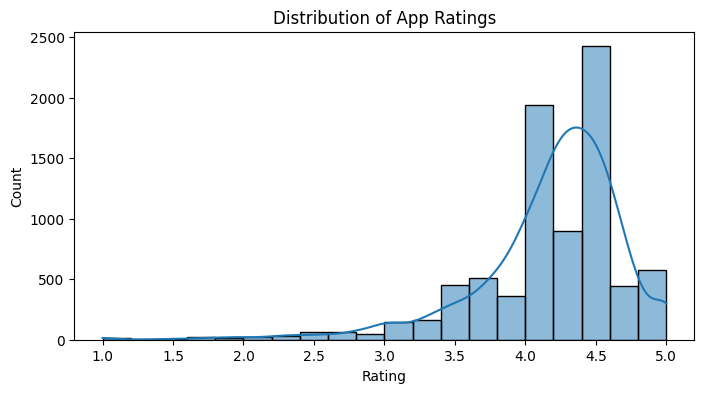

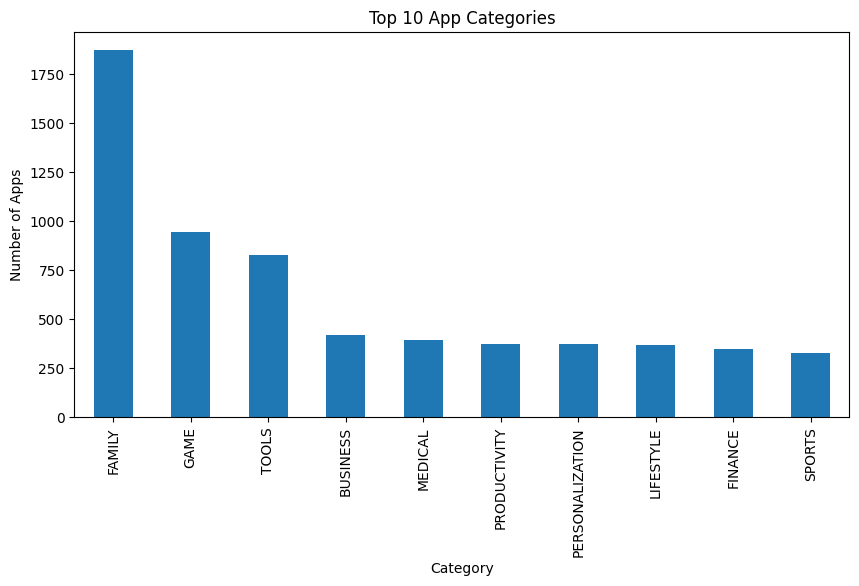

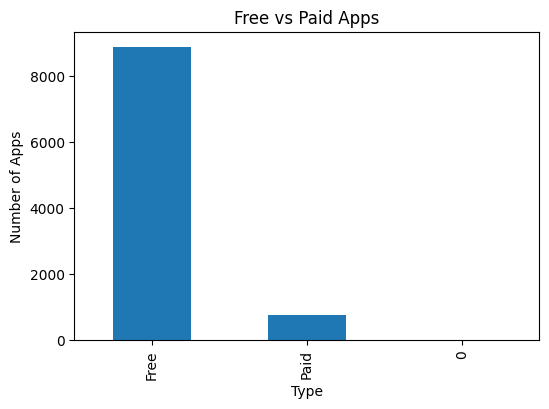

In [22]:
# 1. App Ratings: Distribution
plt.figure(figsize=(8,4))
sns.histplot(ps_df_clean['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# 5. Category: Most common categories
plt.figure(figsize=(10,5))
ps_df_clean['Category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

# 6. Type: Free vs Paid
plt.figure(figsize=(6,4))
ps_df_clean['Type'].value_counts().plot(kind='bar')
plt.title('Free vs Paid Apps')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.show()

### Findings:

Possible rating inflation: The lack of low ratings and the clustering at high values may indicate a bias where users tend to rate apps positively, or low-rated apps are less likely to survive in the store. 

FAMILY is by far the largest category, with almost double the apps compared to the next category.
GAME and TOOLS are also very popular, each with a large number of apps.

The vast majority of apps are Free

# Task 2: Sentiment Analysis

## Analysis and Baseline modelling

### Sentiment Distribution in Reviews

In [101]:
print(ps_review_df_clean['Sentiment'].unique())

['Positive', 'Neutral', 'Negative']
Categories (3, object): ['Negative', 'Neutral', 'Positive']


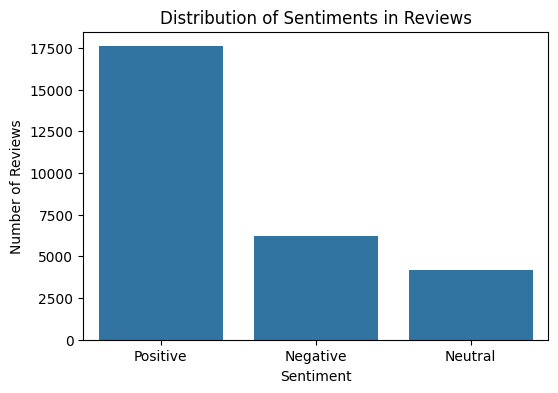

Sentiment
Positive    17593
Negative     6240
Neutral      4161
Name: count, dtype: int64


In [102]:
# Analyze the distribution of sentiments in the reviews dataset

plt.figure(figsize=(6,4))
sns.countplot(data=ps_review_df_clean, x='Sentiment', order=ps_review_df_clean['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Show counts for each sentiment
print(ps_review_df_clean['Sentiment'].value_counts())

In [103]:
# Percentage distribution of sentiments
sentiment_counts = ps_review_df_clean['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)

Sentiment
Positive    62.845610
Negative    22.290491
Neutral     14.863899
Name: proportion, dtype: float64


### Sentiment Statistics and Visualization

In [104]:
# Summary statistics for Sentiment_Polarity and Sentiment_Subjectivity
print(ps_review_df_clean[['Sentiment_Polarity', 'Sentiment_Subjectivity']].describe())

       Sentiment_Polarity  Sentiment_Subjectivity
count        27994.000000            27994.000000
mean             0.169990                0.483735
std              0.344385                0.261186
min             -1.000000                0.000000
25%              0.000000                0.346154
50%              0.140000                0.501591
75%              0.400000                0.650000
max              1.000000                1.000000


In [105]:
# Average polarity and subjectivity per sentiment
print(ps_review_df_clean.groupby('Sentiment')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean())

           Sentiment_Polarity  Sentiment_Subjectivity
Sentiment                                            
Negative            -0.259043                0.536336
Neutral              0.000000                0.080299
Positive             0.362367                0.560497


C:\Users\jeshw\AppData\Local\Temp\ipykernel_11492\3428079153.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(ps_review_df_clean.groupby('Sentiment')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean())


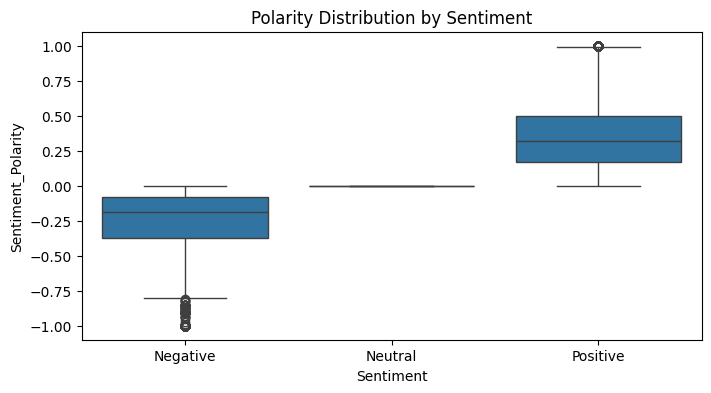

In [106]:
plt.figure(figsize=(8,4))
sns.boxplot(data=ps_review_df_clean, x='Sentiment', y='Sentiment_Polarity')
plt.title('Polarity Distribution by Sentiment')
plt.show()

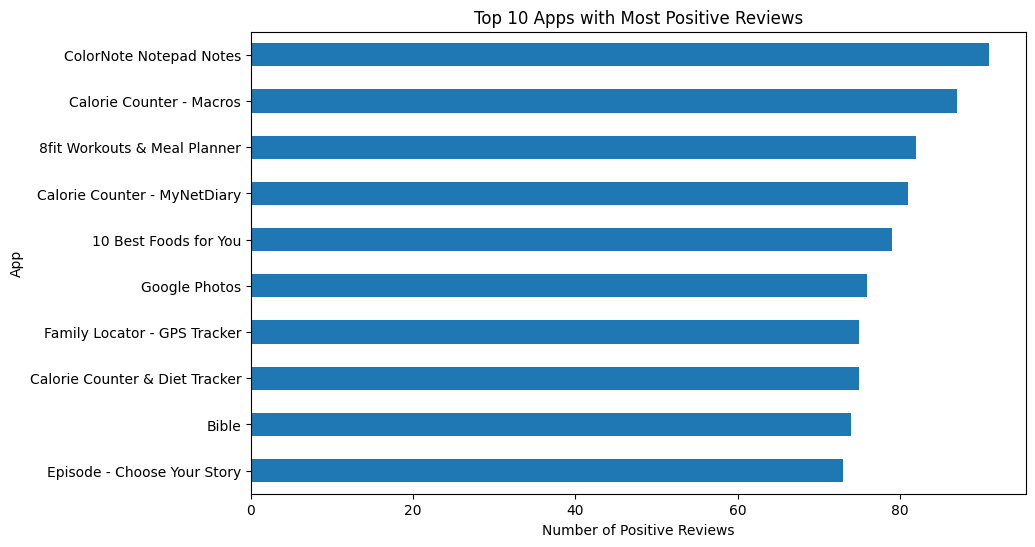

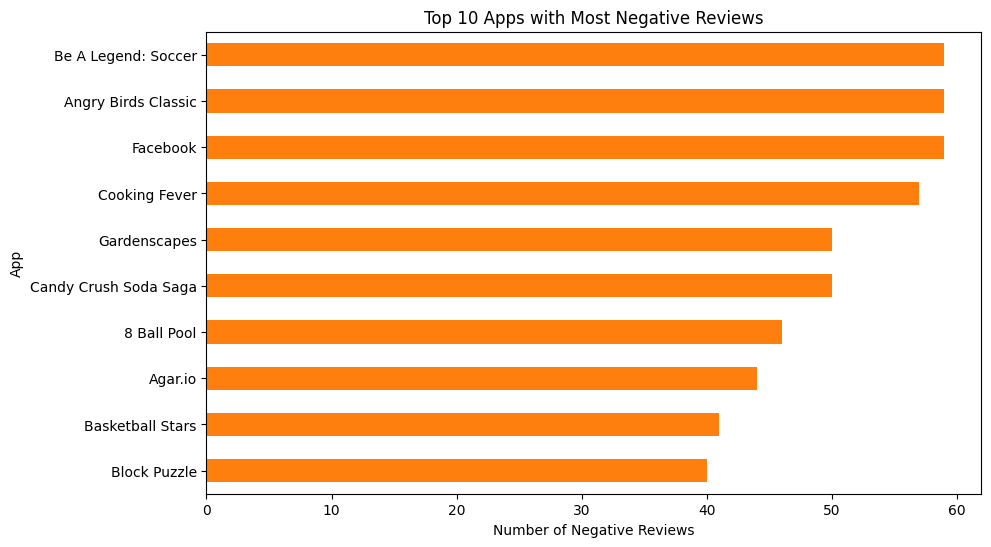

In [107]:
# Calculate top 10 apps with most positive reviews
top_positive = ps_review_df_clean[ps_review_df_clean['Sentiment'] == 'Positive']['App'].value_counts().head(10)

# Calculate top 10 apps with most negative reviews
top_negative = ps_review_df_clean[ps_review_df_clean['Sentiment'] == 'Negative']['App'].value_counts().head(10)

# Visualize Top 10 Apps with Most Positive Reviews
plt.figure(figsize=(10,6))
top_positive.plot(kind='barh', color='tab:blue')
plt.title('Top 10 Apps with Most Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('App')
plt.gca().invert_yaxis()  # Highest at top
plt.show()

# Visualize Top 10 Apps with Most Negative Reviews
plt.figure(figsize=(10,6))
top_negative.plot(kind='barh', color='tab:orange')
plt.title('Top 10 Apps with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('App')
plt.gca().invert_yaxis()
plt.show()

In [108]:
ps_review_df_clean['review_length'] = ps_review_df_clean['Translated_Review'].str.len()
ps_review_df_clean['review_length'].describe()

count       27994.0
mean     112.968993
std      102.563392
min             2.0
25%            37.0
50%            86.0
75%           159.0
max          2713.0
Name: review_length, dtype: Float64

Most reviews are between 30 and 153 characters. There are some very short reviews

In [109]:
print(ps_review_df_clean['Translated_Review'].duplicated().sum())

0


In [110]:
ps_review_df_clean = ps_review_df_clean.drop_duplicates(subset=['Translated_Review'], keep='first').reset_index(drop=True)
print(ps_review_df_clean['Translated_Review'].duplicated().sum())
print(ps_review_df_clean.shape)

0
(27994, 7)


In [112]:
from langdetect import detect, DetectorFactory, LangDetectException
DetectorFactory.seed = 0  # for reproducibility

def safe_detect(x):
    try:
        if isinstance(x, str) and len(x) > 10:
            return detect(x)
        else:
            return 'unknown'
    except LangDetectException:
        return 'unknown'

ps_review_df_clean['lang'] = ps_review_df_clean['Translated_Review'].apply(safe_detect)

print(ps_review_df_clean['lang'].value_counts())

lang
en         24953
unknown     1174
af           290
no           221
fr           181
nl           139
da           134
it           103
ro            89
so            83
ca            77
tl            70
et            66
de            61
id            45
sl            44
cy            42
sv            39
es            38
hr            25
sw            16
sq            16
pl            14
pt            12
fi            12
sk            10
cs            10
vi             9
hu             8
tr             7
lv             3
lt             2
uk             1
Name: count, dtype: int64


In [ ]:
# Create a new DataFrame with only English reviews
ps_review_df_en = ps_review_df_clean[ps_review_df_clean['lang'] == 'en'].reset_index(drop=True)
print(ps_review_df_en.shape)

(24953, 7)


### Sentiment Model Training (Naive Bayes)

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer

# import nltk
# nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in ENGLISH_STOP_WORDS]
    # For lemmatization, use:
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

ps_review_df_en['Translated_Review_clean'] = ps_review_df_en['Translated_Review'].apply(clean_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Feature extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(ps_review_df_en['Translated_Review_clean'])
y = ps_review_df_en['Sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# Train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred = nb_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred)),
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.65      0.62      0.63      1173
     Neutral       0.56      0.11      0.19       605
    Positive       0.77      0.90      0.83      3213

    accuracy                           0.74      4991
   macro avg       0.66      0.54      0.55      4991
weighted avg       0.72      0.74      0.71      4991

Balanced Accuracy: 0.5444818978415816


The model predicts "Positive" sentiment well (High recall (0.91) and F1 (0.84), Expected as its the majority class).

Somewhat reasonable for "Negative" class. 

The model rarely predicts Neutral correctly (Very low recall (0.11), F1 (0.18) ).


Accuracy (0.74): 74% of all predictions are correct, but this is inflated by the majority class (Positive)

Balanced Accuracy (0.54): Low value showing the model struggles with minority classes.

In [ ]:
# Feature extraction with limited vocabulary size to 3000
vectorizer_limited = CountVectorizer(max_features=3000)
X_limit = vectorizer_limited.fit_transform(ps_review_df_en['Translated_Review_clean'])
y_limit = ps_review_df_en['Sentiment']

# Train/test split
X_train_limit, X_test_limit, y_train_limit, y_test_limit = train_test_split(X_limit, y_limit, test_size=0.2, random_state=42, stratify=y_limit)

# Train the Multinomial Naive Bayes model
nb_model.fit(X_train_limit, y_train_limit)

# Predict on test set
y_pred_limit = nb_model.predict(X_test_limit)

# Evaluate
print(classification_report(y_test_limit, y_pred_limit)),
print("Balanced Accuracy:", balanced_accuracy_score(y_test_limit, y_pred_limit))

              precision    recall  f1-score   support

    Negative       0.67      0.65      0.66      1173
     Neutral       0.47      0.38      0.42       605
    Positive       0.82      0.85      0.84      3213

    accuracy                           0.75      4991
   macro avg       0.65      0.63      0.64      4991
weighted avg       0.74      0.75      0.75      4991

Balanced Accuracy: 0.6304008706395748


Scores are higher than before with "Neutral" reviews (Recall 0.38, F1 0.42)

Balanced Accuracy (0.63): Improved, but the model continues to struggle with minority classes, Neutral.

## LLM Sentiment Classification

### LLM Sentiment Prediction Example

In [39]:
from openai import OpenAI

client = OpenAI()

prompt = "Classify sentiment of the review as Positive|Neutral|Negative. Return one word only." 


response = client.responses.create(
    model="gpt-5-mini",
    input= [{ 'role': 'developer', 'content': prompt }, 
            { 'role': 'user', 'content': 'The food that the restaurant was great! I recommend it to everyone.' }],
    reasoning = {
        "effort": "minimal"
    },
)

print("--------------------------------")
print("Output:")
print(response.output_text)
print(response.usage)

--------------------------------
Output:
Positive
ResponseUsage(input_tokens=42, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=7, output_tokens_details=OutputTokensDetails(reasoning_tokens=0), total_tokens=49)


In [40]:
import json

def classify_review_sentiment(review_text):
    prompt = (
        "You are an expert sentiment classifier for Google Play Store app reviews. "
        "Given a user review, respond ONLY with a valid JSON object with one field: "
        "'sentiment' (one of 'Positive', 'Neutral', 'Negative'). "
        "Example: {\"sentiment\": \"Positive\"}"
    )
    try:
        response = client.responses.create(
            model="gpt-5-mini",
            input=[
                {"role": "developer", "content": prompt},
                {"role": "user", "content": review_text}
            ],
            reasoning={"effort": "minimal"}
        )

        # Parse JSON output from LLM
        try:
            result = json.loads(response.output_text)
            return result.get("sentiment", None)
        except Exception as parse_err:
            print("JSON parse error:", parse_err)
            print("Raw output:", response.output_text)
            return None
        
    except Exception as e:
        print("API call failed:", e)
        return None

# Example test:
classify_review_sentiment("The app is easy to use and very helpful. I love it!")

'Positive'

### LLM vs Naive Bayes Comparison

In [41]:
import pandas as pd

# Take a random sample of 100 reviews
sample_df = ps_review_df_en.sample(n=100, random_state=42).copy()

# Get NB predictions
sample_df['NB_Prediction'] = nb_model.predict(vectorizer_limited.transform(sample_df['Translated_Review_clean']))

# Get LLM predictions directly 
sample_df['LLM_Prediction'] = sample_df['Translated_Review'].apply(classify_review_sentiment)

In [42]:
# Compare NB model performance on the sample
print("Naive Bayes Performance on Sample:")
print(classification_report(sample_df['Sentiment'], sample_df['NB_Prediction']))
print("Balanced Accuracy (NB):", balanced_accuracy_score(sample_df['Sentiment'], sample_df['NB_Prediction']))

# Compare LLM performance on the sample
print("\nLLM Performance on Sample:")
print(classification_report(sample_df['Sentiment'], sample_df['LLM_Prediction']))
print("Balanced Accuracy (LLM):", balanced_accuracy_score(sample_df['Sentiment'], sample_df['LLM_Prediction']))

Naive Bayes Performance on Sample:
              precision    recall  f1-score   support

    Negative       0.75      0.60      0.67        25
     Neutral       0.33      0.44      0.38         9
    Positive       0.84      0.86      0.85        66

    accuracy                           0.76       100
   macro avg       0.64      0.64      0.63       100
weighted avg       0.77      0.76      0.76       100

Balanced Accuracy (NB): 0.636026936026936

LLM Performance on Sample:
              precision    recall  f1-score   support

    Negative       0.42      0.88      0.56        25
     Neutral       0.29      0.22      0.25         9
    Positive       0.95      0.58      0.72        66

    accuracy                           0.62       100
   macro avg       0.55      0.56      0.51       100
weighted avg       0.76      0.62      0.64       100

Balanced Accuracy (LLM): 0.5593265993265993


Agreement between NB and LLM predictions: 61.00%
         LLM_Pos  LLM_Neut  LLM_Neg
NB_Pos        40         6       22
NB_Neut        0         1       11
NB_Neg         0         0       20


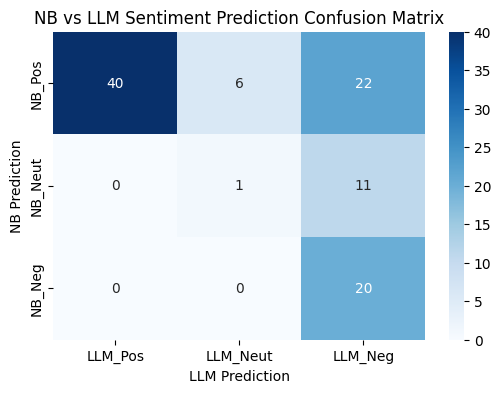

In [43]:
# Compare NB and LLM predictions
agreement = (sample_df['NB_Prediction'] == sample_df['LLM_Prediction']).mean()
print(f"Agreement between NB and LLM predictions: {agreement:.2%}")

# Confusion matrix
conf_matrix = confusion_matrix(sample_df['NB_Prediction'], sample_df['LLM_Prediction'], labels=['Positive', 'Neutral', 'Negative'])
conf_df = pd.DataFrame(conf_matrix, index=['NB_Pos', 'NB_Neut', 'NB_Neg'], columns=['LLM_Pos', 'LLM_Neut', 'LLM_Neg'])
print(conf_df)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('NB vs LLM Sentiment Prediction Confusion Matrix')
plt.xlabel('LLM Prediction')
plt.ylabel('NB Prediction')
plt.show()

For 62 out of 100 reviews, both models predicted the same sentiment.
The models are most consistent for "Negative" reviews.
"Neutral" is the hardest class for both models to agree on.

###  Analysis of Prediction Mismatches

In [44]:
# Show mismatches for LLM from ground truth
mismatches = sample_df[sample_df['Sentiment'] != sample_df['LLM_Prediction']]
for idx, row in mismatches.head(10).iterrows():
    print(f"Review: {row['Translated_Review']}")
    print(f"Ground Truth: {row['Sentiment']}, LLM: {row['LLM_Prediction']}")
    print("---")

Review: It's great game I really love it, reason I gave 3 stars earning diamonds make different choices game. It gives every finished chapter options require 20 way earn I want spend real money decide better option. Fix it'll 5 stars
Ground Truth: Positive, LLM: Negative
---
Review: I reading reviews i'm sure, want waste time putting receipt get ten cents cash year two, i'm going get little two years i'll better
Ground Truth: Positive, LLM: Negative
---
Review: I like game alot fair. If certain level able compete someone levels high alot advantages. It would better fair
Ground Truth: Positive, LLM: Negative
---
Review: Crash Every time open it.
Ground Truth: Neutral, LLM: Negative
---
Review: Amazing photo editing tips tricks....but lately I able upload photos. Please solve problem
Ground Truth: Positive, LLM: Negative
---
Review: It's fine, I keep getting messages people America even I settings set women America. For reason specifically women Philippines, that's ok although would nice

During evaluation, I found that the LLM (GPT-5-mini) often produced sentiment predictions that were more reasonable than the dataset's ground truth labels. Manual inspection of mismatches revealed that many "ground truth" labels were inconsistent or incorrect, especially for ambiguous or mixed reviews.

This highlights a common real-world challenge: **label noise and quality issues in public datasets**. Advanced models like LLMs can sometimes outperform noisy human annotations. Metrics may underestimate LLM performance due to label noise. Also it seems LLM is more likely to classify ambiguous reviews as "Negative" compared to NB.

# Task 3. Insights and Recommendations

## Summarizing App Reviews with LLM

In [46]:
# Merge reviews with app metadata
merged_df = pd.merge(ps_review_df_en, ps_df_clean, on='App', how='inner')
merged_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,review_length,lang,Translated_Review_clean,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,122,en,like eat delici food that im cook food case be...,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,47,en,help eat healthi exercis regular basi,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,42,en,work great especi go groceri store,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
3,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000,20,en,look forward app,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
4,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000,37,en,help site help food,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up


In [48]:
def format_reviews_for_llm(reviews):
    # Number each review for clarity
    return "\n".join([f"Review {i+1}: {r}" for i, r in enumerate(reviews)])

# Group reviews per app with identifiers
app_reviews = merged_df.groupby('App')['Translated_Review'].apply(list).reset_index()
app_reviews['Reviews_for_LLM'] = app_reviews['Translated_Review'].apply(format_reviews_for_llm)

# Example:
print(app_reviews.loc[0, 'Reviews_for_LLM'])

Review 1: I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
Review 2: This help eating healthy exercise regular basis
Review 3: Works great especially going grocery store
Review 4: Looking forward app,
Review 5: It helpful site ! It help foods get !
Review 6: Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.
Review 7: Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)
Review 8: Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!
Review 9: Good health...... Good health first priority.......
Review 10: Health It's important world either life . think? :)
Review 11: Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body
Review 12: Very Useful in diabetes age 30. I need control sugar. thanks
Review 13: Healthy Really helped
Review 14: I found lot wealth 

In [55]:
# Get top 2 apps by positive and negative review count
top2_pos = ps_review_df_en[ps_review_df_en['Sentiment'] == 'Positive']['App'].value_counts().head(2).index.tolist()
top2_neg = ps_review_df_en[ps_review_df_en['Sentiment'] == 'Negative']['App'].value_counts().head(2).index.tolist()

# Filter app_reviews for these apps
selected_apps = top2_pos + top2_neg
selected_reviews = app_reviews[app_reviews['App'].isin(selected_apps)].copy()
selected_reviews['Ground_Truth'] = selected_reviews['App'].map(
    merged_df.groupby('App')['Sentiment'].agg(lambda x: x.mode()[0])
)
selected_reviews


,App,Translated_Review,Reviews_for_LLM,Ground_Truth
109,Angry Birds Classic,[Way many ads. I remember Angry Birds first ca...,Review 1: Way many ads. I remember Angry Birds...,Negative
300,Calorie Counter - Macros,[Works great. Helpful. Fairly user friendly. O...,Review 1: Works great. Helpful. Fairly user fr...,Positive
349,ColorNote Notepad Notes,[This best note system I've ever used! Easy si...,Review 1: This best note system I've ever used...,Positive
525,Facebook,"[If I open link different browser, refreshes f...","Review 1: If I open link different browser, re...",Negative


In [54]:
def summarize_app_reviews(app_name, reviews_text):
    prompt = (
        "You are an expert sentiment analyst for Google Play Store app reviews. "
        "Given multiple user reviews for an app, respond ONLY with a valid JSON object with two fields: "
        "'summary' (2-3 sentences summarizing common praise, complaints, and overall sentiment), "
        "and 'overall_sentiment' (one of 'Positive', 'Neutral', 'Negative'). "
        "Example: {\"summary\": \"Users love the intuitive interface but complain about ads.\", \"overall_sentiment\": \"Positive\"}"
    )
    try:
        response = client.responses.create(
            model="gpt-5-mini",
            input=[
                {"role": "developer", "content": prompt},
                {"role": "user", "content": reviews_text}
            ],
            reasoning={"effort": "medium"}
        )
        # Parse JSON output from LLM
        try:
            result = json.loads(response.output_text)
            return result
        except Exception as parse_err:
            print("JSON parse error:", parse_err)
            print("Raw output:", response.output_text)
            return None
    except Exception as e:
        print("API call failed:", e)
        return None

# Summarize for each selected app
for idx, row in selected_reviews.iterrows():
    result = summarize_app_reviews(row['App'], row['Reviews_for_LLM'])
    print(f"App: {row['App']}\nSummary: {result.get('summary')}\nOverall Sentiment: {result.get('overall_sentiment')}\n---")

App: Angry Birds Classic
Summary: Users still praise the core Angry Birds gameplay, nostalgia and visuals, calling it fun and addictive. However, overwhelming complaints cite intrusive, frequent and often unskippable video ads, persistent crashes/freezes that cause lost power-ups and progress, and pay-to-progress mechanics or forced grinding (stars/gems), with some reporting inappropriate ads for kids. Many reviewers say the updates ruined the experience, have uninstalled the app, and demand fixes or an ad-free paid option.
Overall Sentiment: Negative
---
App: Calorie Counter - Macros
Summary: Users consistently praise the app's simple, intuitive design and accurate macro tracking—easy logging, useful charts, custom food entry and a helpful barcode scanner—and many prefer it to alternatives. However, reliability is a major complaint: frequent crashes, loading/data-sync and online search/barcode failures after updates or phone changes, lost entries and limited editing/weight/net-carb fe

## Synthetic User Data & Recommendation System

### Synthetic User-App Dataset Creation

In [82]:
import numpy as np

# apps that have at least one negative review in English
neg_review_counts = ps_review_df_en[ps_review_df_en['Sentiment'] == 'Negative']['App'].value_counts()
apps_with_50_neg_reviews = neg_review_counts[neg_review_counts >= 50].index

num_users = 12  
user_ids = [f"user_{i+1}" for i in range(num_users)]  

synthetic_data = []
for user in user_ids:
    # Randomly choose number of installed apps for each user (between 60 and 100)
    num_installed = np.random.randint(60, 101)
    # Randomly select installed apps for this user
    installed_apps = np.random.choice(apps_with_neg_reviews, size=num_installed, replace=False)
    # Add each (user, app) pair to the dataset
    for app in installed_apps:
        synthetic_data.append({"User": user, "App": app})

# Final Synthetic Dataset
synthetic_df = pd.DataFrame(synthetic_data)

print(synthetic_df.head())
print(f"Shape: {synthetic_df.shape}")

     User                                             App
0  user_1                        GasBuddy: Find Cheap Gas
1  user_1                   Fraction Calculator Plus Free
2  user_1  Hotspot Shield Free VPN Proxy & Wi-Fi Security
3  user_1                      ABC News - US & World News
4  user_1                    FastMeet: Chat, Dating, Love
Shape: (960, 2)


In [83]:
# Merge synthetic user-app data with app metadata
user_apps = pd.merge(synthetic_df, ps_df_clean[['App', 'Category', 'Rating']], on='App', how='left')
user_apps

,User,App,Category,Rating
0,user_1,GasBuddy: Find Cheap Gas,TRAVEL_AND_LOCAL,4.6
1,user_1,Fraction Calculator Plus Free,TOOLS,4.5
2,user_1,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2
3,user_1,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0
4,user_1,"FastMeet: Chat, Dating, Love",DATING,4.2
...,...,...,...,...
955,user_12,"BestCam Selfie-selfie, beauty camera, photo ed...",BEAUTY,3.9
956,user_12,All Mental disorders,MEDICAL,4.5
957,user_12,Experian - Free Credit Report,FINANCE,4.6
958,user_12,FBReader: Favorite Book Reader,BOOKS_AND_REFERENCE,4.5


### Identifying Bad Apps for Users

In [84]:
bad_rating_threshold = 3.5
good_rating_threshold = 4.0

# Find bad apps for each user
bad_apps = user_apps[user_apps['Rating'] < bad_rating_threshold]
bad_apps

,User,App,Category,Rating
146,user_2,Free Dating Hook Up Messenger,DATING,3.3
161,user_2,Entel,LIFESTYLE,3.2
169,user_2,Free Foreclosure Real Estate Search by USHUD.com,HOUSE_AND_HOME,3.4
283,user_4,HTC Sense Input,TOOLS,3.4
321,user_5,Baseball Boy!,GAME,3.4
369,user_5,ColorSnap® Visualizer,HOUSE_AND_HOME,3.4
431,user_6,Free Foreclosure Real Estate Search by USHUD.com,HOUSE_AND_HOME,3.4
445,user_6,Free Dating Hook Up Messenger,DATING,3.3
463,user_6,Entel,LIFESTYLE,3.2
466,user_6,Anthem BC Anywhere,MEDICAL,2.6


## LLM-Powered App Recommendation

### Candidate Replacement App Selection

In [92]:
# Select a user and one bad app
user_id = "user_11"
user_bad_apps = bad_apps[bad_apps['User'] == user_id]
bad_app_row = user_bad_apps.iloc[0]
bad_app = bad_app_row['App']
category = bad_app_row['Category']
bad_rating = bad_app_row['Rating']

print(f"User: {user_id} | Bad app: {bad_app} | Category: {category} | Rating: {bad_rating}")

User: user_11 | Bad app: Free Foreclosure Real Estate Search by USHUD.com | Category: HOUSE_AND_HOME | Rating: 3.4000000953674316


In [93]:
# Get user's negative reviews for the bad app
user_neg_reviews = ps_review_df_en[
    (ps_review_df_en['App'] == bad_app) &
    (ps_review_df_en['Sentiment'] == 'Negative')
]['Translated_Review'].tolist()
print("User's complaints:", user_neg_reviews)

User's complaints: ['Outdated information. None houses listed still sale.', 'Database outdated. Still shows homes sale sold 2016 2017. This 2018 houses sale.', 'Worst software ever typical govt. Websites.', 'The site potential good please work bugs. The crashing images showing slow loading. thing internet connection bad.', 'This worst... It freezes stop working searching home. Also give rental listing homes... NOT IS AS THEY SAY!!!! LIES!!!!!', 'Garbage. Won\'t even get past County section searching. If hit back button, it\'ll give menu, features "to added".', 'The homes date work properly. Horrible. Do waste time app.', 'I came see foreclosures, put limit 200,000$, took little two minutes load... guess I saw... eight houses construction, currently built... called foreclosures yet show them, would show regular houses??? Horrible!', 'The information ridiculously outdated. Then crashed. Attempted contact developer could find option so. Uninstalling!', "Might useless software ever. Won't 

In [94]:
# Find candidate replacement apps in the same category

candidates = ps_df_clean[
    (ps_df_clean['Category'] == category) &
    (ps_df_clean['Rating'] >= good_rating_threshold)
]
already_installed = user_apps[user_apps['User'] == user_id]['App'].values
candidates = candidates[~candidates['App'].isin(already_installed)]
print("Candidate apps:", candidates['App'].head(3).tolist())

Candidate apps: ['Room planner: Interior & Floorplan Design for IKEA', 'Apartment List: Housing, Apt, and Property Rentals', 'House app: beautiful everyday ~']


### Scoring Candidate Apps with LLM

In [99]:
results = []
for idx, row in candidates.head(3).iterrows():
    cand_app = row['App']
    cand_rating = row['Rating']
    pos_reviews = ps_review_df_en[
        (ps_review_df_en['App'] == cand_app) &
        (ps_review_df_en['Sentiment'] == 'Positive')
    ]['Translated_Review'].tolist()

    prompt = (
        "You are an expert app recommender for Google Play Store. "
        f"A user is unhappy with app '{bad_app}' (Category: {category}, Rating: {bad_rating}).\n"
        f"Here are their main complaints:\n{user_neg_reviews}\n"
        f"Here are positive reviews for candidate app '{cand_app}':\n{pos_reviews}\n"
        "Based on the user's complaints and the candidate app's positive reviews, "
        "does this candidate app address the user's issues or offer a better experience? "
        "Respond ONLY with a valid JSON object with two fields: "
        "'score' (integer 0-10, higher means better recommendation), and "
        "'reason' (2-3 sentences explaining your score and why this app is or isn't a good replacement). "
        "Example: {\"score\": 8, \"reason\": \"This app has many positive reviews about stability and features the user wants. It is likely to solve their complaints.\"}"
    )

    response = client.responses.create(
        model="gpt-5-mini",
        input=[{"role": "developer", "content": prompt}],
        reasoning={"effort": "medium"}
    )
    import json
    result = json.loads(response.output_text)
    print(f"Candidate: {cand_app} | Score: {result.get('score')} | Reason: {result.get('reason')}\n")
    results.append({"App": cand_app, "Score": result.get('score'), "Reason": result.get('reason')})

Candidate: Room planner: Interior & Floorplan Design for IKEA | Score: 1 | Reason: Room Planner is an interior design/floorplan app, not a real-estate or foreclosure search tool, so it will not address the user’s core complaints about outdated listings, search errors, or missing foreclosure data. While it might be more stable or visually polished, it’s not a suitable replacement for a property-search app.

Candidate: Apartment List: Housing, Apt, and Property Rentals | Score: 7 | Reason: Apartment List has many positive reviews praising stability, fast loading, up-to-date listings, and easy-to-use search and contact features, so it would likely resolve the crashes, slowness, and stale-data problems. However, it is primarily focused on rentals and apartment hunting rather than foreclosure sales, so it may not satisfy a user specifically seeking foreclosure listings.

Candidate: House app: beautiful everyday ~ | Score: 1 | Reason: The candidate app appears to be a general home/beauty ins

### Selecting the Best Recommendation

In [100]:
# Select best candidate
if results:
    best = max(results, key=lambda x: x['Score'])
    print(f"\nBest Recommendation for user '{user_id}':")
    print(f"App: {best['App']}\nScore: {best['Score']}\nReason: {best['Reason']}")
else:
    print("No suitable candidate found.")


Best Recommendation for user 'user_11':
App: Apartment List: Housing, Apt, and Property Rentals
Score: 7
Reason: Apartment List has many positive reviews praising stability, fast loading, up-to-date listings, and easy-to-use search and contact features, so it would likely resolve the crashes, slowness, and stale-data problems. However, it is primarily focused on rentals and apartment hunting rather than foreclosure sales, so it may not satisfy a user specifically seeking foreclosure listings.


# Conclusion

###  Key Findings

- Most apps have high ratings
- The majority of reviews are positive.
- Naive Bayes performs well for positive sentiment, but struggles with neutral/negative.
- LLMs provide more nuanced and reliable sentiment classification and recommendations.
- LLM-based recommendations can effectively match user complaints to better apps.

### Limitations

- Public datasets may contain noisy or mislabeled reviews.
- Sentiment models are limited by training data quality and class imbalance.
- Synthetic user data does not reflect real user behavior.

### Future Work

- Try with recommendation algorithms (collaborative filtering etc).
- Deploy as a web app for interactive recommendations.